<div class="usecase-title"> Impact of employment on housing prices </div>

<div class="usecase-authors"><b>Authored by: Manasa Nagaraja</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<h2>Scenario </h2>
<div>In the busy city of Melbourne, urban planners and policymakers are constantly seeking insights into the complex dynamics between employment patterns and housing markets. With the City of Melbourne's Census of Land Use and Employment (CLUE) dataset at their disposal, they start on a mission to delve deep into this relationship.

Armed with the "Jobs per ANZSIC for blocks" dataset, which provides detailed employment data across various industries and geographical areas, the team sets out to uncover correlations with house prices by small area. My aim is clear to understand how fluctuations in employment levels within different ANZSIC industries impact housing prices in Melbourne's diverse neighborhoods.

As I have to analyze the data, patterns begin to emerge and observe that certain industries, such as technology or finance, exhibit a strong influence on nearby housing prices, driving up demand and property values. On the other hand, fluctuations in employment levels within other industries may have a lesser impact or even a negative correlation with house prices.

With these insights, urban planners gain a deeper understanding of the factors shaping Melbourne's housing market. Armed with data-driven evidence, I can modify urban development strategies to contribute to economic growth, ensure housing affordability, and create vibrant, sustainable communities for Melbourne's residents.</div>

<h3>What this use case will teach you ?</h3>

At the end of this use case you will:
*  I will learn how to merge and clean datasets from different sources,
   ensuring data consistency for analysis.
*  Performing Exploratory Data Analysis I will learn to understand the
   structure of the data, identify patterns, and uncover relationships between variables.
*  I will gain experience in assessing the correlation between
  employment trends across various industries and house prices in different areas, using statistical techniques.
*  This use case will provide an opportunity to apply statistical methods
  to analyze the data, such as hypothesis testing and regression analysis, to draw meaningful conclusions.
*  I am Planning to upskill with machine learning to explore machine learning algorithms to predict house prices based on employment data and other factors, enhancing your understanding of predictive modeling techniques.
*  By analysing the impact of employment on housing prices, I will gain insights into urban planning considerations and the economic dynamics of melbourne areas.


<h3>Introduction</h3>

In this project, I will be analyzing the relationship between employment trends and housing prices within the City of Melbourne. By searching into datasets provided by the City of Melbourne, I aim to understand how fluctuations in employment across different industries impact the housing market. This analysis holds significant implications for urban planning, economic development, within Melbourne. The datasets include information on employment levels categorized by industry (ANZSIC codes) and housing prices by small area.
Employment patterns have a great influence on housing demand and property prices. Changes in employment levels within specific industries can lead to shifts in population demographics, housing preferences, and overall market dynamics. Understanding these correlations is essential for urban planners, and stakeholders to make informed decisions regarding housing affordability, workforce development, and infrastructure planning.

Through this project, I would like to understand the insights of the relation between employment and housing markets. By leveraging data science techniques, statistical analysis, and machine learning algorithms, I aim to identify patterns, trends, and correlations that can inform strategic decision-making processes. Ultimately, my goal is to contribute to the creation of smarter, gain deeper insights into the dynamics of cities, and identify the areas for improvement, and develop innovative solutions to advance inclusive and strong communities.

<h4>Dataset List</h4>

*   Jobs per ANZSIC for blocks
*   House Prices by Small Area - Sale Year

<h4> Contents </h4>

*   Import important Libraries
*   Connect, Test and Analysis of Datasets







In [3]:
# Standard
import os
import json
import io
# Data import
import requests

# Data manipulation
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVR
from scipy.stats import norm, skew

In [18]:
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/employment-by-block-by-anzsic/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

# Use functions to download and load data
df = download_and_load_csv(download_link_1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Census year                                      12394 non-null  int64  
 1   Block ID                                         12394 non-null  int64  
 2   CLUE small area                                  12394 non-null  object 
 3   Accommodation and Food Services                  9554 non-null   float64
 4   Administrative and Support Services              10373 non-null  float64
 5   Agriculture, Forestry and Fishing                12099 non-null  float64
 6   Arts and Recreation Services                     8465 non-null   float64
 7   Construction                                     10319 non-null  float64
 8   Education and Training                           9841 non-null   float64
 9   Electricity, Gas, Water and 

In [20]:
display(df)

,Census year,Block ID,CLUE small area,Accommodation and Food Services,Administrative and Support Services,"Agriculture, Forestry and Fishing",Arts and Recreation Services,Construction,Education and Training,"Electricity, Gas, Water and Waste Services",...,Manufacturing,Mining,Other Services,"Professional, Scientific and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade,Total jobs in block
0,2018,1101,Docklands,565.0,38.0,0.0,6.0,0.0,0.0,2092.0,...,NaN,0.0,209.0,0.0,NaN,54.0,878.0,632.0,0.0,6970.0
1,2018,1107,Docklands,NaN,0.0,0.0,5.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,126.0
2,2018,1109,Docklands,437.0,170.0,NaN,3.0,37.0,27.0,NaN,...,NaN,0.0,108.0,433.0,11.0,142.0,60.0,118.0,48.0,1758.0
3,2018,1110,Docklands,203.0,NaN,0.0,246.0,62.0,NaN,NaN,...,NaN,0.0,25.0,NaN,0.0,21.0,610.0,0.0,0.0,2118.0
4,2018,1111,West Melbourne (Industrial),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,0.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2006,551,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12390,2006,553,Kensington,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
12391,2006,554,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12392,2006,555,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.drop(["Block ID","Accommodation and Food Services","Administrative and Support Services","Agriculture, Forestry and Fishing","Arts and Recreation Services",
         "Construction","Education and Training","Electricity, Gas, Water and Waste Services","Financial and Insurance Services","Health Care and Social Assistance",
         "Information Media and Telecommunications","Manufacturing","Mining","Other Services","Professional, Scientific and Technical Services","Public Administration and Safety",
         "Rental, Hiring and Real Estate Services","Retail Trade","Transport, Postal and Warehousing","Wholesale Trade"
       ], axis=1, inplace=True)

In [22]:
df3 = pd.DataFrame(df)

# Convert 'Census year' column to datetime format
df3['Census year'] = pd.to_datetime(df3['Census year'], format='%Y')

# Filter data to keep only years till 2016
df_filtered = df3[df3['Census year'].dt.year <= 2016]

# Print the filtered DataFrame
display(df_filtered)

,Census year,CLUE small area,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
12389,2006-01-01,Kensington,0.0
12390,2006-01-01,Kensington,NaN
12391,2006-01-01,Kensington,0.0
12392,2006-01-01,Kensington,0.0


In [75]:
df5 = pd.DataFrame(df_filtered)

# Filter data to keep only rows where 'CLUE small area' is neither 'City of Melbourne' nor 'West Melbourne (Residential)'
df_filtered2 = df5[~df5['CLUE small area'].isin(['City of Melbourne (total)', 'West Melbourne (Industrial)'])]

# Print the filtered DataFrame
print(df_filtered2)

      Census year  CLUE small area  Total jobs in block
215    2016-01-01  Melbourne (CBD)                 15.0
216    2016-01-01  Melbourne (CBD)                718.0
217    2016-01-01  Melbourne (CBD)               4572.0
218    2016-01-01  Melbourne (CBD)               3991.0
219    2016-01-01  Melbourne (CBD)               2168.0
...           ...              ...                  ...
12389  2006-01-01       Kensington                  0.0
12390  2006-01-01       Kensington                  NaN
12391  2006-01-01       Kensington                  0.0
12392  2006-01-01       Kensington                  0.0
12393  2006-01-01       Kensington                  5.0

[8547 rows x 3 columns]


In [76]:
# Rename columns
melbourne_job = df_filtered2.rename(columns={"Census year": "Year",
                                  "CLUE small area": "Region"})

In [77]:
display(melbourne_job)

,Year,Region,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
12389,2006-01-01,Kensington,0.0
12390,2006-01-01,Kensington,NaN
12391,2006-01-01,Kensington,0.0
12392,2006-01-01,Kensington,0.0


In [78]:
melbourne_job.shape

(8547, 3)

In [79]:
melbourne_job.isna().sum()

Year                      0
Region                    0
Total jobs in block    1905
dtype: int64

In [80]:
melbourne_job.dropna(inplace = True)

In [81]:
melbourne_job.isna().sum()

Year                   0
Region                 0
Total jobs in block    0
dtype: int64

In [34]:
# data set name
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

df1 = download_and_load_csv(download_link_2)

In [36]:
df7 = pd.DataFrame(df1)

df_filtered4 = df7[df7['Small_Area'] != 'NA']

# Print the resulting DataFrame
print(df_filtered4)

     Sale_Year                    Small_Area                   Type  \
0         2000                       Carlton        House/Townhouse   
1         2000                       Carlton  Residential Apartment   
2         2000                East Melbourne        House/Townhouse   
3         2000                East Melbourne  Residential Apartment   
4         2000                    Kensington        House/Townhouse   
..         ...                           ...                    ...   
342       2016                     Docklands        House/Townhouse   
343       2016               North Melbourne        House/Townhouse   
344       2016                   South Yarra  Residential Apartment   
345       2016  West Melbourne (Residential)  Residential Apartment   
346       2016                           NaN  Residential Apartment   

     Median_Price  Transaction_Count  
0        316250.0                116  
1        220000.0                309  
2        622500.0             

In [37]:
df_filtered4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale_Year          347 non-null    int64  
 1   Small_Area         340 non-null    object 
 2   Type               347 non-null    object 
 3   Median_Price       319 non-null    float64
 4   Transaction_Count  347 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


In [38]:
df_filtered4.head()

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [39]:
df_filtered4.isnull().any()

Sale_Year            False
Small_Area            True
Type                 False
Median_Price          True
Transaction_Count    False
dtype: bool

In [40]:
df_filtered4.isna().sum()

Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64

In [41]:
df_filtered4.dropna(inplace = True)

In [42]:
df_filtered4.isna().sum()

Sale_Year            0
Small_Area           0
Type                 0
Median_Price         0
Transaction_Count    0
dtype: int64

In [43]:
df_filtered4.isnull().any()

Sale_Year            False
Small_Area           False
Type                 False
Median_Price         False
Transaction_Count    False
dtype: bool

In [47]:
# Rename columns
houseprice_melbourne = df_filtered4.rename(columns={"Sale_Year": "Year",
                                  "Small_Area": "Region","Type":"House_type","Median_price":"House_price",})

In [49]:
# Check duplicate rows
houseprice_melbourne[houseprice_melbourne.duplicated()]


,Year,Region,House_type,Median_Price,Transaction_Count


In [50]:
houseprice_melbourne.drop_duplicates(inplace=True)

(EDA) - Exploratory Data Analysis for Jobs per ANZSIC for blocks and House Prices by Small Area - Sale Year

In [82]:
melbourne_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 215 to 12393
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 6642 non-null   datetime64[ns]
 1   Region               6642 non-null   object        
 2   Total jobs in block  6642 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 207.6+ KB


<ipython-input-83-657621df7a56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_job["Total jobs in block"], fit=norm)


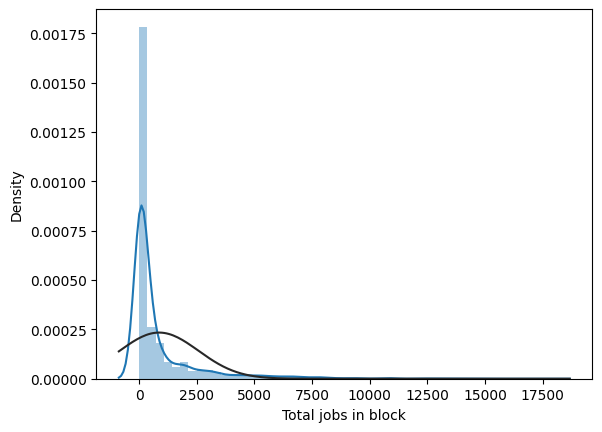

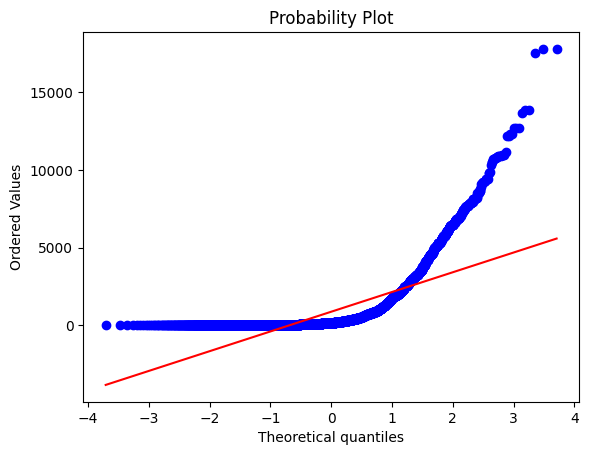

In [83]:
sns.distplot(melbourne_job["Total jobs in block"], fit=norm)
fig = plt.figure()
prob = stats.probplot(melbourne_job["Total jobs in block"], plot=plt)

In [99]:
# Value < Q1 - 1,5*IQR OR Value > Q3 + 1,5 * IQR
def finding_outliers(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower =  data[variable_name].quantile(0.25) -1.5*iqr
    upper =  data[variable_name].quantile(0.75) + 1.5*iqr
    return data [(data[variable_name] < lower) | (data[variable_name] > upper)]

<Axes: ylabel='Total jobs in block'>

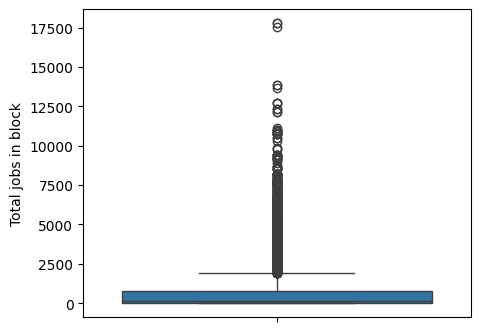

In [104]:
plt.figure(figsize=(5,4))
sns.boxplot(y="Total jobs in block", data=melbourne_job)
#plt.savefig('static/images/price_with_outliers.jpg')

<Axes: ylabel='Total jobs in block'>

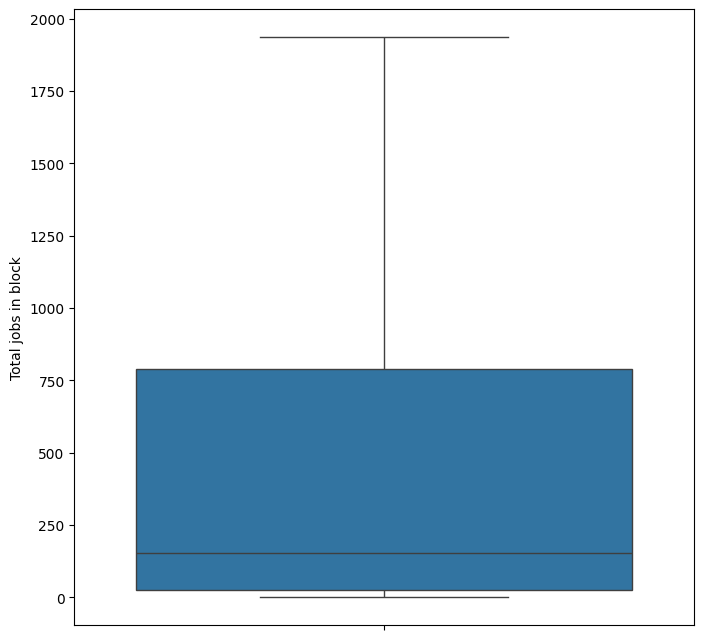

In [105]:
# # Price outliers
finding_outliers(melbourne_job, "Total jobs in block").sort_values("Total jobs in block")

# For price
iqr_price = melbourne_job["Total jobs in block"].quantile(0.75) - melbourne_job["Total jobs in block"].quantile(0.25)
melbourne_job["Total jobs in block"].quantile(0.75) + 1.5 * iqr_price
melbourne_job.loc[(finding_outliers(melbourne_job, "Total jobs in block").index, "Total jobs in block")] = melbourne_job["Total jobs in block"].quantile(0.75) + 1.5 * iqr_price

# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Total jobs in block", data=melbourne_job)

In [106]:
houseprice_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 345
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               316 non-null    int64  
 1   Region             316 non-null    object 
 2   House_type         316 non-null    object 
 3   Median_Price       316 non-null    float64
 4   Transaction_Count  316 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 14.8+ KB


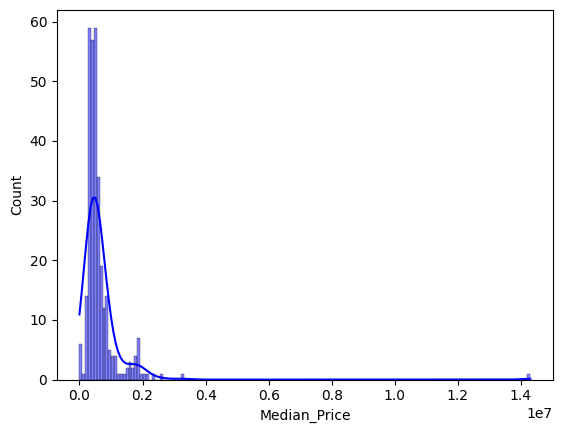

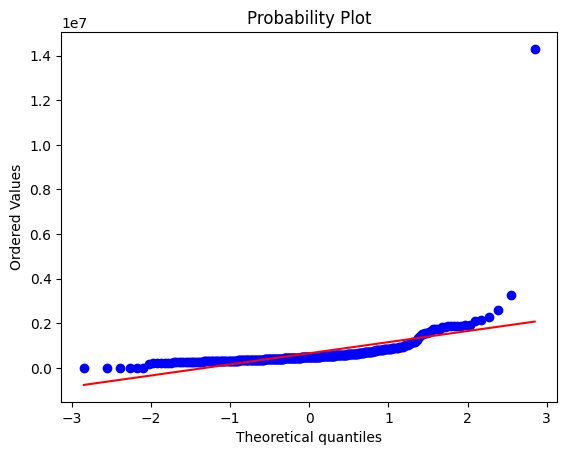

In [ ]:
# Plotting the distribution of prices
sns.histplot(data=df_filtered4["Median_Price"], kde=True, color="blue" )
plt.show()

# Creating a probability plot
fig = plt.figure()
prob = stats.probplot(df_filtered4["Median_Price"], plot=plt)
plt.show()

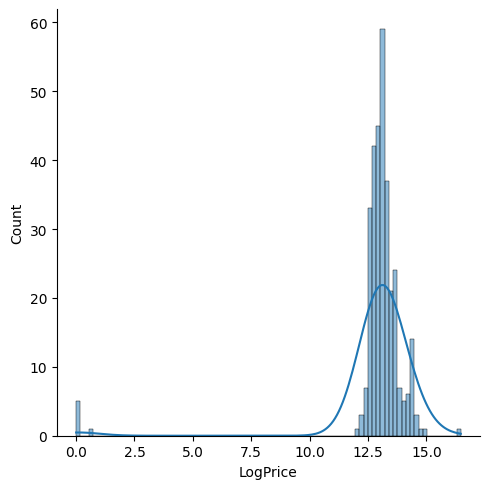

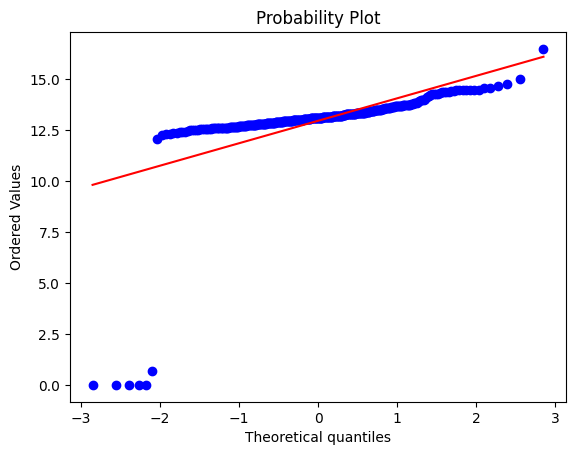

In [ ]:
# Add a new column for log-transformed prices, handling zero or negative values
df_filtered4["LogPrice"] = np.log(df_filtered4["Median_Price"] + 1)  # Adding 1 to avoid taking the log of zero

# Plot the distribution of log-transformed prices using displot
# Plot the distribution of log-transformed prices using displot
dist_price = sns.displot(df_filtered4["LogPrice"], kde=True, kde_kws={"bw_adjust": 1.5})
plt.show()


# Create a probability plot for log-transformed prices
fig = plt.figure()
prob_log = stats.probplot(df_filtered4["LogPrice"], plot=plt)
plt.show()


<ipython-input-62-1cd9aa36d74e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_prices["LogPrice"] = np.log(positive_prices["Median_Price"])
<ipython-input-62-1cd9aa36d74e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  dist_price = sns.distplot(positive_prices["LogPrice"], fit=norm)


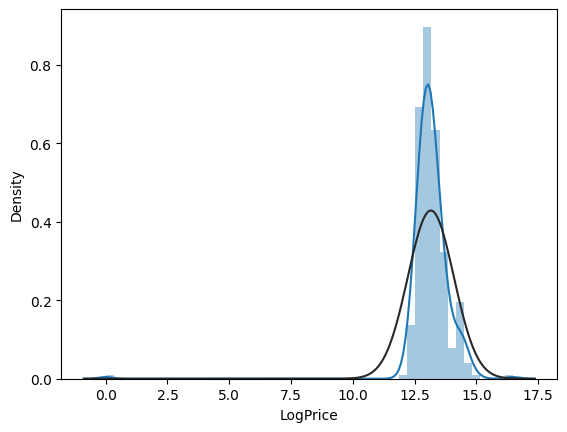

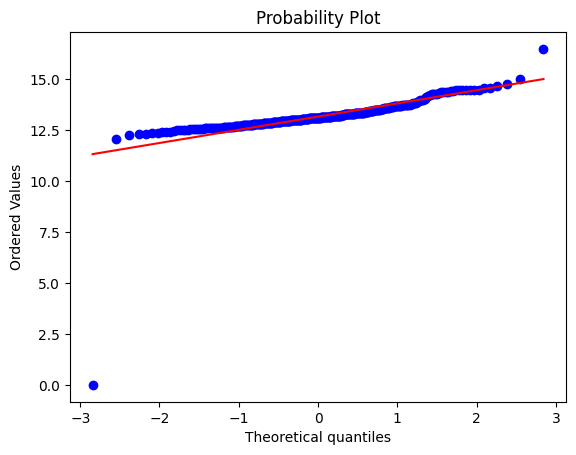

In [ ]:
# Since the probability plot looks like log distribution, we can transform it with np.log()
positive_prices["LogPrice"] = np.log(positive_prices["Median_Price"])

# Plot the distribution of log-transformed prices
dist_price = sns.distplot(positive_prices["LogPrice"], fit=norm)
fig = plt.figure()
prob_log = stats.probplot(positive_prices["LogPrice"], plot=plt)
plt.show()
